# Setup

In [1]:
# required for odeformer, although it's annoying to run these so i made the required changes in odeformer
%pip install torch==2.0.0
%pip install numpy==1.23.5

# changed arg weights_only = False in torch.load in sklearn_wrapper to fix a loading error from running dstr = odeformer.model.SymbolicTransformerRegressor, i.e.
# model = torch.load(model_path, weights_only=False)

# also changed np.infty to np.inf

In [2]:
# give colab permission to access drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# replace with your drive paths to MIVLE repo, odeformer repo, and shared probing_data folder
repo_path = '/content/drive/MyDrive/github/subteams/LLMProbing'
odeformer_path = '/content/drive/MyDrive/aisc'
samples_path = '/content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/samples/demo_manual'
activations_path = '/content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/activations/demo_manual_new'
probes_path = '/content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp_solver'

In [4]:
import sys
import importlib
sys.path.append(repo_path)
sys.path.append(odeformer_path)
import numpy as np
import os
import pickle

In [5]:
import odeformer.model
dstr = odeformer.model.SymbolicTransformerRegressor(from_pretrained=True)
model_args = {'beam_size': 10, 'beam_temperature': 0.8} # higher beam temp seems to be better for avoiding nans in solutions
dstr.set_model_args(model_args)

Downloading...
From (original): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W
From (redirected): https://drive.google.com/uc?id=1L_UZ0qgrBVkRuhg5j3BQoGxlvMk_Pm1W&confirm=t&uuid=791aba31-a528-41c0-a258-97ad4ac3cec7
To: /content/odeformer.pt
100%|██████████| 465M/465M [00:06<00:00, 69.6MB/s]


Loaded pretrained model


# Manual Sample Generation

In [6]:
# from src.sample_generation import ManualSamplesGenerator

In [7]:
# msg = ManualSamplesGenerator(samples_path=samples_path)

In [8]:
# # Times array
# t_values = np.linspace(1, 10, 50)

# # Exponential parameters
# c_values = np.linspace(-10,10, 2)
# a_values = np.linspace(-10,10, 5)

# # Hyperbolic parameters
# t0_values = np.linspace(10.1, 100, 5)

In [9]:
# # Generate exponential samples
# msg.generate_exponential_samples(t_values, c_values, a_values)

In [10]:
# # Generate hyperbolic samples
# msg.generate_hyperbolic_samples(t_values, c_values, t0_values)

# Extract activations

In [11]:
# from src.activation_extraction import ActivationsExtractor

In [12]:
# act_extractor = ActivationsExtractor()

In [13]:
# act_extractor.extract_activations(dstr, samples_path, activations_path)

# Train probes

In [6]:
import experiments

In [7]:
target_feature = 'exponential'
r2_threshold = -1
layers = [idx for idx in range(0, 16)]

In [8]:
expt_results = experiments.run_experiment.separability_testing_w_solver(target_feature=target_feature, activations_path=activations_path, \
                     probes_path=probes_path, \
                     layers=layers, r2_threshold=r2_threshold)
# save experiment results
with open(f'{probes_path}/experiment_data.pt', 'wb') as f:
    pickle.dump(expt_results, f)

Probe trained on layer 0: Test Set Loss 0.8947817087173462, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp_solver/probe_exponential_0_0.pt
Probe trained on layer 1: Test Set Loss 0.37383314967155457, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp_solver/probe_exponential_1_0.pt
Probe trained on layer 2: Test Set Loss 0.6128058433532715, Test Set Accuracy 1.0
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp_solver/probe_exponential_2_0.pt
Probe trained on layer 3: Test Set Loss 0.6654530763626099, Test Set Accuracy 0.5
Saved state dictionary to /content/drive/MyDrive/github/subteams/LLMProbing/local_experiment_data/probes/demo_exp_solver/probe_exponential_3_0.pt
Probe trained on layer 4: Test Set Loss 5.045936859460198e-07, Test Set Accuracy 1.0
Sa

In [9]:
expt_results

,layer,test_loss,test_accuracy,test_fail_ids,final_train_loss,final_train_accuracy,final_val_loss,final_val_accuracy
0,0,8.947817e-01,1.0,[],9.327872e-12,1.0,5.867131e-01,1.0
1,1,3.738331e-01,1.0,[],1.016587e-11,1.0,4.074759e-01,1.0
2,2,6.128058e-01,1.0,[],1.171885e-11,1.0,6.535728e-01,0.5
3,3,6.654531e-01,0.5,[exp_9],6.607557e-10,1.0,4.360937e-01,1.0
4,4,5.045937e-07,1.0,[],6.736886e-07,1.0,2.320766e-06,1.0
5,5,8.342523e-05,1.0,[],9.685049e-05,1.0,5.001225e-05,1.0
6,6,1.448516e-02,1.0,[],8.324804e-02,1.0,3.524316e-02,1.0
7,7,2.420285e-02,1.0,[],2.538686e-02,1.0,5.574674e-02,1.0
8,8,3.312778e-07,1.0,[],8.758691e-06,1.0,1.785763e-06,1.0
9,9,5.458162e-07,1.0,[],6.134441e-07,1.0,9.160642e-07,1.0


# Plot results

In [10]:
import experiments.utils as expt_utils

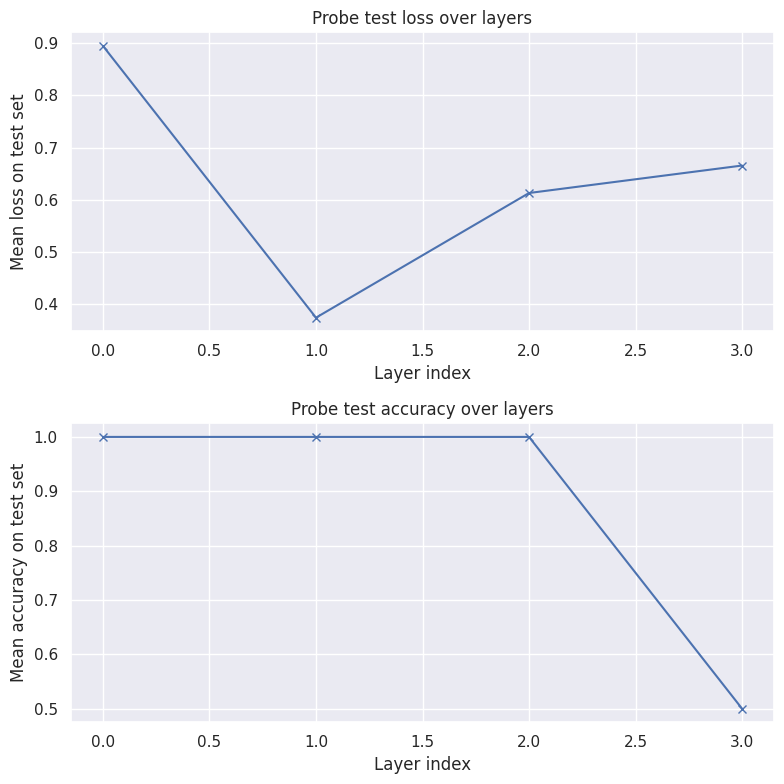

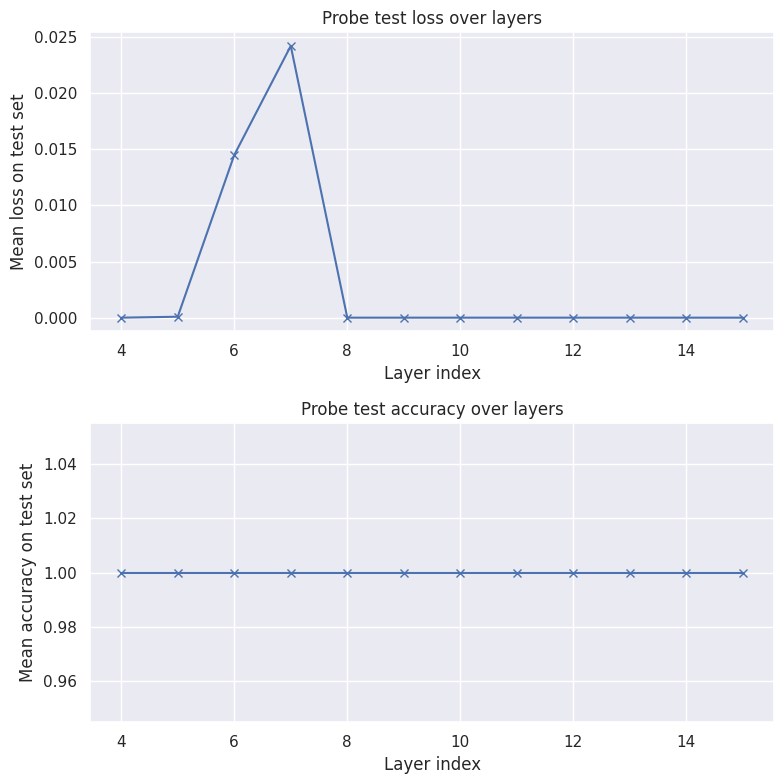

In [14]:
# load expt results
with open(f'{probes_path}/experiment_data.pt', 'rb') as f:
    expt_results = pickle.load(f)
expt_summary = expt_utils.summarise_experiment(expt_results, incl_acc=True)

# plot encoder layers
expt_utils.plot_from_summary(expt_summary, descriptor='expvshyp', layers = [0,1,2,3], incl_acc=True)

# plot decover layers
expt_utils.plot_from_summary(expt_summary, descriptor='evpvshyp', layers = range(4,16), incl_acc=True)